# Estatísticas da CCD

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils_ccd import get_connection

conn = get_connection(db="BdDIP")
conn_processo = get_connection()

## Processos no Setor

In [13]:
sql_processos_setor = ''' SELECT DISTINCT pro.numero_processo,
       pro.IdProcesso as id,
       pro.ano_processo,
       pro.assunto,
       pm.Descricao as marcador

FROM processo.dbo.Processos pro
LEFT JOIN processo.dbo.Pro_MarcadorProcesso pmp ON pmp.IdProcesso = pro.IdProcesso
LEFT JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
WHERE pro.setor_atual = 'CCD'

'''
processos_ccd = pd.read_sql(sql_processos_setor, get_connection())

/tmp/ipykernel_100973/618280715.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  processos_ccd = pd.read_sql(sql_processos_setor, get_connection())


In [12]:
len(processos_ccd)

1375

In [22]:
df_marcador = processos_ccd.groupby('marcador').id.nunique().sort_values(ascending=False).reset_index()

/tmp/ipykernel_100973/3000742377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='marcador', data=df_marcador, palette='viridis')


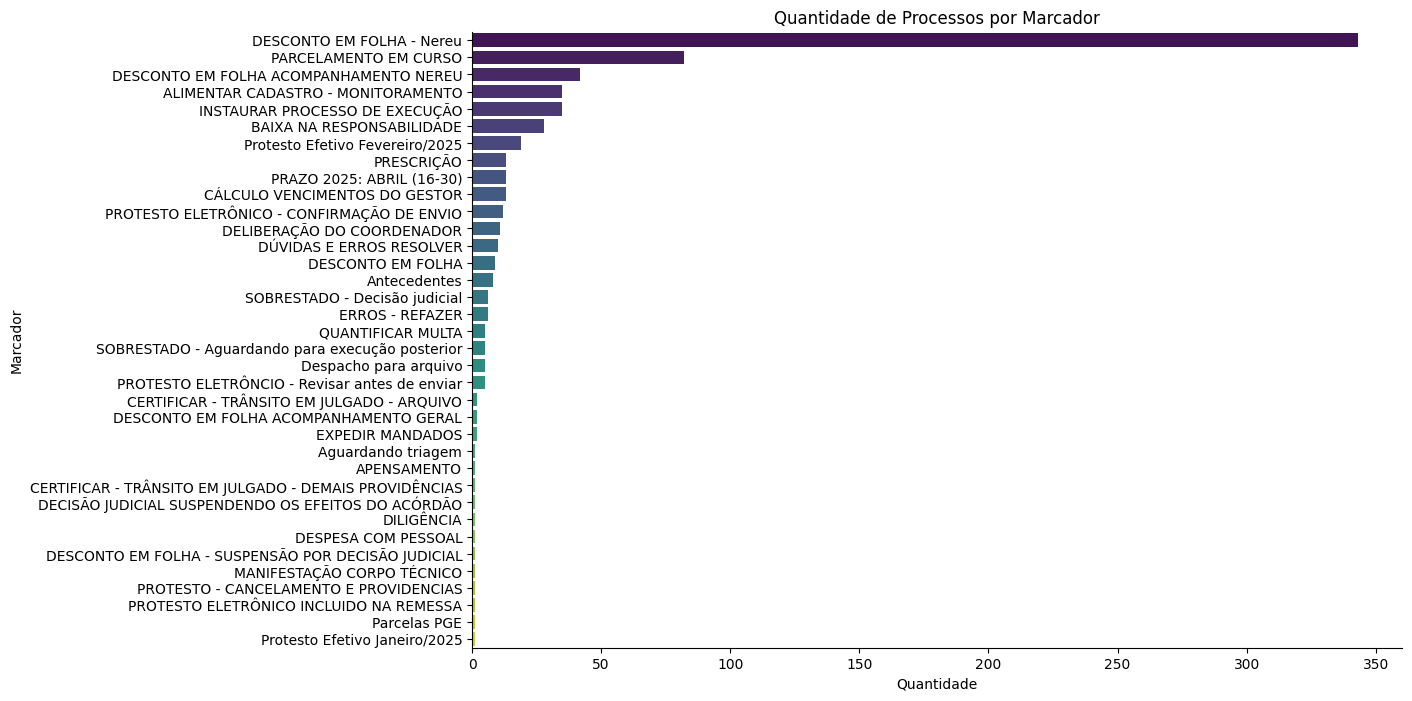

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='id', y='marcador', data=df_marcador, palette='viridis')
plt.title('Quantidade de Processos por Marcador')
plt.xlabel('Quantidade')
plt.ylabel('Marcador')
sns.despine(top=True, right=True)
plt.show()

In [29]:
df_marcador['categoria'] = 'outros'
df_marcador['marcador'] = df_marcador['marcador'].str.lower()
df_marcador.loc[df_marcador.marcador.str.contains('desconto'), 'categoria'] = 'desconto'
df_marcador.loc[df_marcador.marcador.str.contains('nereu'), 'categoria'] = 'nereu'
df_marcador.loc[df_marcador.marcador.str.contains('sobrestado'), 'categoria'] = 'sobrestado'
df_marcador.loc[df_marcador.marcador.str.contains('protesto'), 'categoria'] = 'protesto'
df_marcador.loc[df_marcador.marcador.str.contains('julgado'), 'categoria'] = 'transito em julgado'
df_marcador.loc[df_marcador.marcador.str.contains('erros'), 'categoria'] = 'erros'
df_marcador.loc[df_marcador.marcador.str.contains('vencimentos'), 'categoria'] = 'cálculo vencimentos'
df_marcador.loc[df_marcador.marcador.str.contains('monitoramento'), 'categoria'] = 'monitoramento'
df_marcador.loc[df_marcador.marcador.str.contains('execução'), 'categoria'] = 'execução'

/tmp/ipykernel_100973/2575102010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).index,


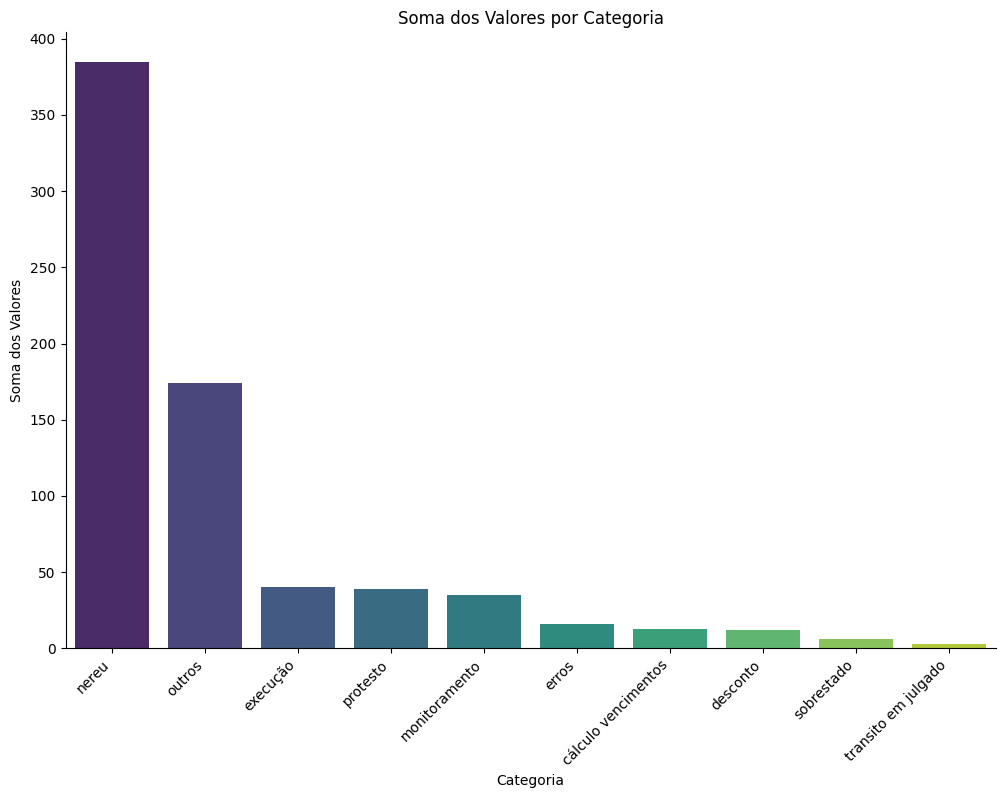

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).index,
            y=df_marcador.groupby('categoria')['id'].sum().sort_values(ascending=False).values,
            palette='viridis')
plt.title('Soma dos Valores por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Soma dos Valores')
plt.xticks(rotation=45, ha='right')
sns.despine(top=True, right=True)
plt.show()

## Decisões

In [7]:
sql_decisoes = """
SELECT *
FROM vwDecisao
"""

In [8]:
df_decisoes = pd.read_sql(sql_decisoes, conn)

/tmp/ipykernel_183691/3741850577.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_decisoes = pd.read_sql(sql_decisoes, conn)


In [9]:
len(df_decisoes)

109431

In [10]:
df_decisoes.head()

,IdInformacao,numero_processo,ano_processo,codigo_tipo_processo,assunto,setor,resumo,data_resumo,arquivo,datapublicacao
0,183468,000739,2006,INE,INEXIGIBILIDADE DE LICITAÇÃO (EM ATENDIMENTO À...,secsc,EMENTA: INEXIGIBILIDADE DE LICITAÇÃO E PAGAMEN...,2010-07-14 09:04:53.827,secsc/secsc_000739_2006_0005.pdf,NaT
1,235433,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:32:39.200,secsc/secsc_011136_2003_0011.pdf,NaT
2,235434,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:32:54.297,secsc/secsc_011136_2003_0012.pdf,NaT
3,235443,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:39:03.977,secsc/secsc_011136_2003_0013.pdf,NaT
4,235460,011136,2003,CTR,CONTRATO Nº003/AGN 2003(EM ATENDIMENTO A DILIG...,secsc,EMENTA: APURAÇÃO DE RESPONSABILIDADE POR ATRAS...,2011-10-11 11:56:10.370,secsc/secsc_011136_2003_0014.pdf,NaT


In [15]:
df_decisoes['ano'] = df_decisoes.data_resumo.dt.year
df_decisoes['mes'] = df_decisoes.data_resumo.dt.month
df_decisoes['ano_mes'] = df_decisoes.data_resumo.dt.to_period('M')

In [32]:
len(df_decisoes)

109431

In [16]:
df_decisoes.groupby(['ano_mes']).count().reset_index()['IdInformacao'].mean()

np.float64(441.2540322580645)

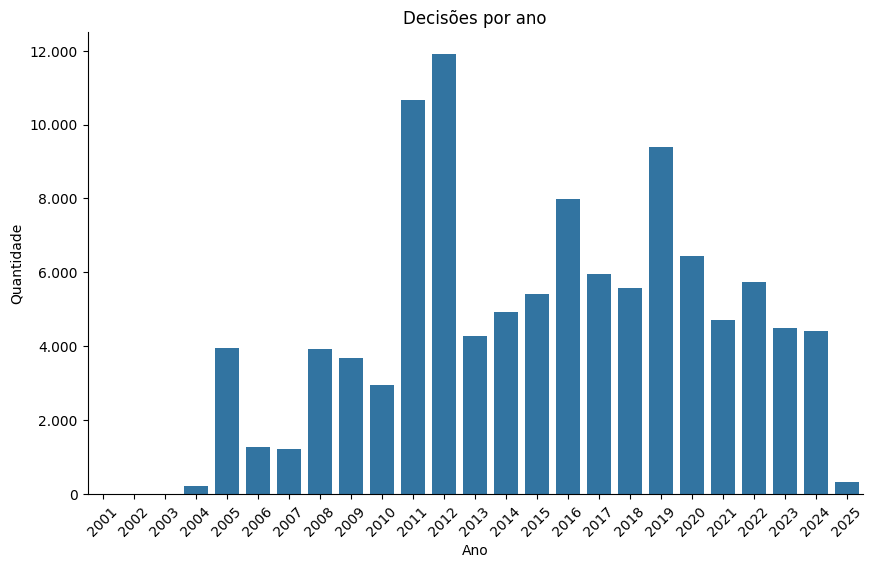

In [31]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_decisoes['ano'].value_counts().index, y=df_decisoes['ano'].value_counts().values)
plt.title('Decisões por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

## Obrigações

In [38]:
sql_obrigacoes = """
SELECT *
FROM Obg_Obrigacao
"""

df_obg = pd.read_sql(sql_obrigacoes, conn_processo)

sql_obrigacoes_retiradas = """
SELECT *
FROM Obg_ObrigacaoRetirada
"""

df_obg_ret = pd.read_sql(sql_obrigacoes_retiradas, conn_processo)

/tmp/ipykernel_183691/3852579996.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obg = pd.read_sql(sql_obrigacoes, conn_processo)
/tmp/ipykernel_183691/3852579996.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_obg_ret = pd.read_sql(sql_obrigacoes_retiradas, conn_processo)


In [39]:
len(df_obg), len(df_obg_ret)

(948, 504)

In [63]:
df_obg['ano'] = df_obg.DataInclusao.dt.year
df_obg['mes'] = df_obg.DataInclusao.dt.month
df_obg['ano_mes'] = df_obg.DataInclusao.dt.to_period('M')

In [67]:
df_obg.columns

Index(['IdObrigacao', 'TipoObrigacao', 'TextoObrigacao', 'IdStatusObrigacao',
       'PrazoInicioDeterminacao', 'PrazoFimDeterminacao',
       'IdProcessoOriginario', 'IdComposicaoPautaFinalizacao',
       'ClassificacaoObrigacao', 'IdMonitoramento', 'CodOrgaoObrigacao',
       'UsuarioInclusao', 'DataInclusao', 'IdSessao', 'IdComposicaoPauta',
       'IdObrigacaoRenovada', 'PossuiPrazo', 'IdInformacao', 'ano', 'mes',
       'ano_mes'],
      dtype='object')

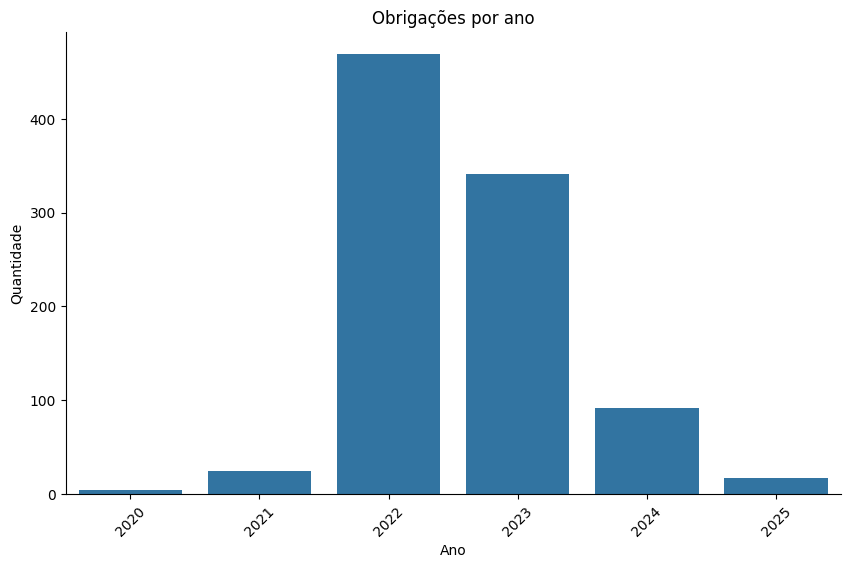

In [64]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_obg['ano'].value_counts().index, y=df_obg['ano'].value_counts().values)
plt.title('Obrigações por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

In [75]:
df_obg.head()

,IdObrigacao,TipoObrigacao,TextoObrigacao,IdStatusObrigacao,PrazoInicioDeterminacao,PrazoFimDeterminacao,IdProcessoOriginario,IdComposicaoPautaFinalizacao,ClassificacaoObrigacao,IdMonitoramento,...,DataInclusao,IdSessao,IdComposicaoPauta,IdObrigacaoRenovada,PossuiPrazo,IdInformacao,ano,mes,ano_mes,TextoObrigacao_cleaned
0,1,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 13:02:49.267,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
1,2,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 13:05:24.397,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
2,3,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,325697,None,Definitivo,None,...,2020-12-03 14:11:11.943,8894988,79258,None,False,1840063.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
3,4,Recomendacao,"ACORDAM os Conselheiros, nos termos do voto pr...",1,None,None,539600,None,Provisorio,None,...,2020-12-03 14:15:38.083,8894988,94836,None,False,1840062.0,2020,12,2020-12,"ACORDAM os Conselheiros, nos termos do voto pr..."
4,5,Recomendacao,a) pelo DEFERIMENTO DA MEDIDA CAUTELAR para qu...,1,None,None,533281,None,Definitivo,None,...,2021-01-08 13:16:22.490,8906686,94786,None,False,1864068.0,2021,1,2021-01,a) DEFERIMENTO MEDIDA CAUTELAR para a Prefeita...


In [79]:
print(df_obg.iloc[0].TextoObrigacao)

ACORDAM os Conselheiros, nos termos do voto proferido
pela Conselheira Relatora, julgar pela homologação do Termo de Ajustamento de Gestão nº
003/2020-pg celebrado entre o Ministério Público de Contas e o Governo do Estado do Rio
Grande do Norte, por meio da Controladoria-Geral do Estado, Secretaria de Estado do
Planejamento e das Finanças e Procuradoria-Geral do Estado, conforme as cláusulas
encartadas na referida avença, devendo a Secretaria das Sessões proceder com a publicação
integral do referido termo.
Em virtude da referida homologação, pelo SOBRESTAMENTO dos autos pelo período do
cumprimento integral do TAG ora homologado, restando ainda SUSPENSO o prazo
prescricional (art. 113 da LCE nº 464/12 c/c art. 330, inciso III, do RITCERN).
Após a publicação do Acórdão e Termo de Ajustamento de Gestão por parte da Secretaria das
Sessões, os autos deverão seguir ao Ministério Público de Contas para sobrestamento do
feito e monitoramento do TAG.


In [76]:
df_obg.TipoObrigacao.value_counts()

TipoObrigacao
Recomendacao    861
Determinacao     87
Name: count, dtype: int64

In [62]:
len(df_obg.CodOrgaoObrigacao.unique())

155

## Multas

In [46]:
sql_multas = """ 
SELECT * 
    FROM processo.dbo.Exe_Debito
"""

df_multas = pd.read_sql(sql_multas, conn_processo)

/tmp/ipykernel_183691/1331304471.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_multas = pd.read_sql(sql_multas, conn_processo)


In [47]:
len(df_multas)

26574

In [55]:
df_multas['ano'] = df_multas.datainclusao.dt.year
df_multas['mes'] = df_multas.datainclusao.dt.month
df_multas['ano_mes'] = df_multas.datainclusao.dt.to_period('M')

In [60]:
df_multas['ano_mes'].value_counts().mean()

np.float64(219.6198347107438)

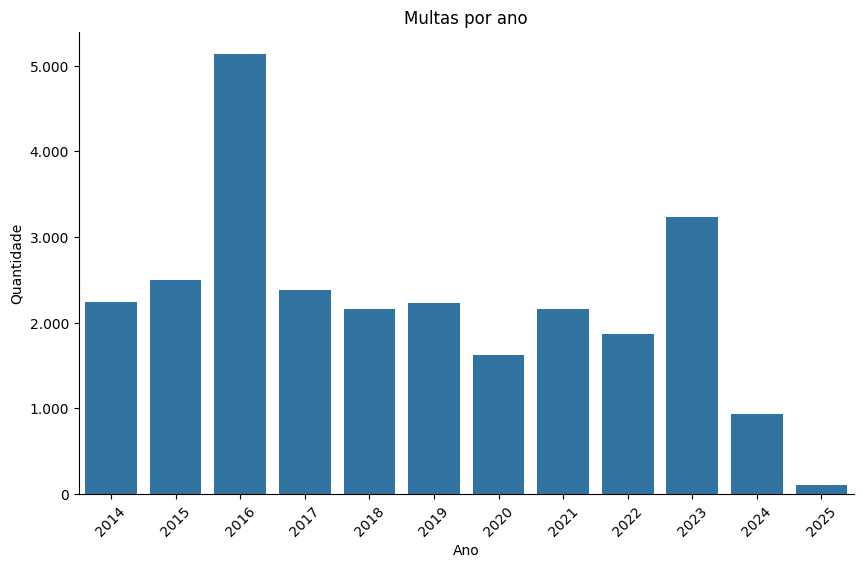

In [58]:
import locale

plt.figure(figsize=(10, 6))
sns.barplot(x=df_multas['ano'].value_counts().index, y=df_multas['ano'].value_counts().values)
plt.title('Multas por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
sns.despine()
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: locale.format_string("%d", x, grouping=True)))
plt.show()

In [50]:
df_multas.TipodeBaixa.unique()

array([None, False, True], dtype=object)

In [ ]:
df_multas.datainclusao

np.float64(1994.0)